### We will build simple fully connected network with one hidden layer from scratch using only numpy. It includesincludes feed forward and back probagation pass, and Adam optimization step.

Num training example  1437
Number [[4]]


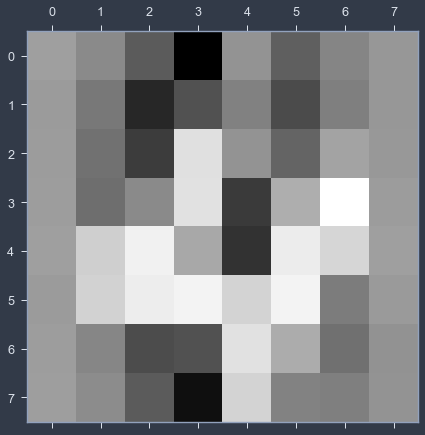

In [16]:
import numpy as np

import sklearn
from sklearn import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# load toy dataset MNIST using sklearn
X,y = sklearn.datasets.load_digits(return_X_y=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.reshape(y.shape[0],1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Num training example ", len(X_train))

idx = np.random.randint(0,10,1)
plt.matshow(X[idx,:].reshape(8,8))
print("Number", y[idx])

In [21]:
# hyper parameters
num_iter = 1+10000
learning_rate = 1e-4
beta = 0.9
beta2 = 0.999
epsilon = 1e-8
reg_lambda =1e-4

# init
X = X_train
y = y_train
m = X.shape[0] 
n = X.shape[1] # node in input layer
n1 = 20 # node in hidden layer
nclass = len(np.unique(y)) # node in output layer

# convert y to 1 hot vector
Y = np.zeros((m,nclass))
for i in range(m):
    Y[i,y[i]] = 1
    
np.random.seed(42)

W1 = np.random.randn(n,n1)*0.1
b1 = np.random.randn(1)
VW1 = Vb1 = SW1 = Sb1 = 0

W2 = np.random.randn(n1,nclass)*0.1
b2 = np.random.randn(1)
VW2 = Vb2 = SW2 = Sb2 = 0

# TRAINING
for i in range(1,num_iter):
    # FORWARD
    Z1 = X.dot(W1) + b1 # m,nclass
    
    # relu
    A1 = np.maximum(0,Z1)
    
    Z2 = A1.dot(W2) + b2
    
    # softmax
    t_sum = np.exp(Z2).sum(1).reshape(-1,1)
    A2 = np.exp(Z2)/t_sum

    # categorical cross entropy cost + regulization term (l2)
    j = (-Y*np.log(A2)).sum()/m + reg_lambda*((W1**2).sum()+(W2**2).sum())/m
    debug(f'Z2 {Z2.shape} A2 {A2.shape} W2 {W2.shape}')
    
    if i % 1000 == 999:
        print('iter: ',i,' loss: ', j)
        print(f'accuracy: {np.mean(np.argmax(A2,axis=1).reshape(-1,1)==y)}')
    
    # BACKWARD
    # derivative respect to j
    dZ2 = A2 - Y
    dW2 = A1.transpose().dot(dZ2)/m + reg_lambda*W2
    db2 = dZ2.sum()/m
    debug(f'dZ2 {dZ2.shape} dW2 {dW2.shape}')
    
    dZ1 = dZ2.dot(W2.transpose())*(Z1>0)
    dW1 = X.transpose().dot(dZ1)/m + reg_lambda*W1
    db1 = dZ1.sum()/m
    
    # Optimization using Adam
    # momentum
    VW1 = beta*VW1 + (1-beta)*dW1
    Vb1 = beta*Vb1 + (1-beta)*db1
    # rmsprop
    SW1 = beta2*SW1 + (1-beta2)*dW1**2
    Sb1 = beta2*Sb1 + (1-beta2)*db1**2
    # update weight 
    W1 -= learning_rate*VW1/(np.sqrt(SW1)+epsilon)
    b1 -= learning_rate*Vb1/(np.sqrt(Sb1)+epsilon)
    
      # momentum
    VW2 = beta*VW2 + (1-beta)*dW2
    Vb2 = beta*Vb2 + (1-beta)*db2
    # rmsprop
    SW2 = beta2*SW2 + (1-beta2)*dW2**2
    Sb2 = beta2*Sb2 + (1-beta2)*db2**2
    # update weight 
    W2 -= learning_rate*VW2/(np.sqrt(SW2)+epsilon)
    b2 -= learning_rate*Vb2/(np.sqrt(Sb2)+epsilon)



iter:  999  loss:  0.33404358059328143
accuracy: 0.9436325678496869
iter:  1999  loss:  0.149410105214433
accuracy: 0.9714683368128044
iter:  2999  loss:  0.08105248198508481
accuracy: 0.9874739039665971
iter:  3999  loss:  0.044964365986895086
accuracy: 0.9951287404314544
iter:  4999  loss:  0.024713870713465
accuracy: 0.9986082115518441
iter:  5999  loss:  0.013421465240428903
accuracy: 1.0
iter:  6999  loss:  0.00750418257301898
accuracy: 1.0
iter:  7999  loss:  0.004430008779468833
accuracy: 1.0
iter:  8999  loss:  0.002802116022138718
accuracy: 1.0
iter:  9999  loss:  0.001962378100643207
accuracy: 1.0


Training accuracy reach 100% under 1000 training epoch

In [23]:
# INFERENCE
X = X_test
y = y_test

Z1 = X.dot(W1) + b1 # m,nclass

# relu
A1 = np.maximum(0,Z1)

Z2 = A1.dot(W2) + b2

# softmax
t_sum = np.exp(Z2).sum(1).reshape(-1,1)
A2 = np.exp(Z2)/t_sum

y_pred = np.argmax(A2,1).reshape(-1,1)
print("Num test example ", len(X_test))
print(sklearn.metrics.classification_report(y,y_pred))

Num test example  360
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      0.97      0.98        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



We got 97% accuracy on test set. For our 1 layer fully connected network, the result is not too shaby!